In [9]:
import example
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

In [1]:
def get_nodes(events):
    if events is None:
        return []
    
    nodes = []
    
    for event in events:
        if event.get('agent') is not None:
            nodes.append(f'{event["event"]}:{event["agent"][0]}')
        else:
            nodes.append(event['event'])
            
        nodes.extend(get_nodes(event['triggered']))
    
    return nodes

In [2]:
def get_edges(events):
    if events is None:
        return []
    
    edges = []
    
    for event in events:
        for triggered in event['triggered']:
            src = event['event']
            dest = triggered['event']
            
            if triggered.get('agent') is not None:
                dest += f':{triggered["agent"][0]}'
            
            if event.get('agent') is not None:
                src += f':{event["agent"][0]}'
                
            edges.append((src, dest))
            edges.extend(get_edges(event['triggered']))
    
    return edges

In [22]:
trace = example.w.process_with_callback(
    lambda w, r: w.reset_agents(),
    ['dine'], 
    ignore_exceptions=True
)

nodes = get_nodes(trace)
edges = get_edges(trace)

G = nx.DiGraph()

origin_events = [e['event'] for e in trace]

for node in nodes:
    if node in origin_events:
        # top level events
        G.add_node(node, size=15, group=1)
    else:
        G.add_node(node, group=2)

G.add_edges_from(edges)
net = Network(notebook=True, directed=True, bgcolor='#222222', font_color='white')
net.from_nx(G)
net.show("nx.html")

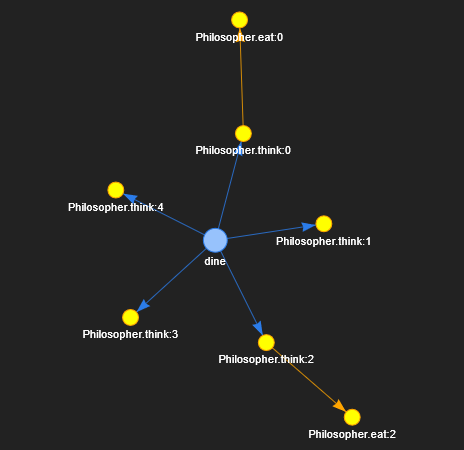